In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

start=time.time()


In [2]:
x_data=pd.read_csv('./Training Data/Logistic_X_Train.csv')

In [3]:
x_data

,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603
...,...,...,...
2995,-0.455628,1.302303,-1.338027
2996,-0.434551,1.597813,-1.748643
2997,0.088277,1.638789,-2.193641
2998,1.525155,0.859234,1.505308


In [4]:
x_data.describe()

,f1,f2,f3
count,3000.000000,3000.000000,3000.000000
mean,0.007453,0.999286,0.029487
std,1.334138,1.023853,1.209558
min,-3.470773,-3.692615,-3.286481
25%,-1.045220,0.325665,-0.986959
50%,-0.144115,1.004693,0.225411
75%,1.052555,1.693354,1.041319
max,3.741376,4.185015,2.706148


In [5]:
y_data=pd.read_csv('./Training Data/Logistic_Y_Train.csv')

In [6]:
y_data

,label
0,1
1,1
2,1
3,0
4,0
...,...
2995,1
2996,1
2997,1
2998,0


In [7]:
x_data=x_data.values
y_data=y_data.values

In [8]:
print(x_data.shape,y_data.shape)

(3000, 3) (3000, 1)


In [9]:
# y_data=y_data.reshape(3000,1)

In [10]:
# data=np.hstack([x_data,y_data])

In [11]:
# data.shape

In [12]:
# data

In [13]:
u=np.mean(x_data,axis=0)
std=np.std(x_data,axis=0)
x_data=(x_data-u)/std
# print(u)

In [14]:
ones=np.ones((x_data.shape[0],1))
x_data=np.hstack((ones,x_data))

In [15]:
x_data.shape

(3000, 4)

D:\anaconda\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


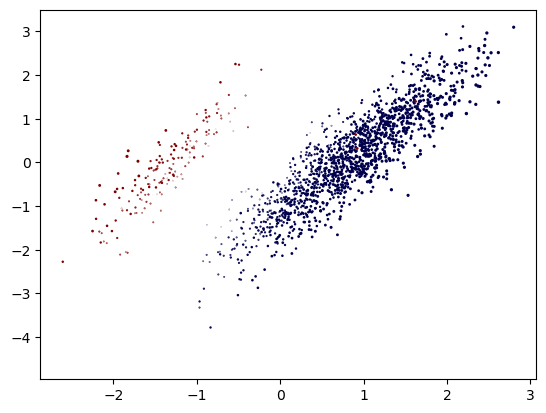

In [16]:
plt.scatter(x_data[:,1],x_data[:,2],x_data[:,3],c=y_data,cmap=plt.cm.seismic)

In [17]:
# x_data[:(int)(x_data.shape[0]*split),:].shape

In [18]:
split=0.7
train_x=x_data[:(int)(x_data.shape[0]*split),:]
train_y=y_data[:(int)(y_data.shape[0]*split),]
test_x=x_data[(int)(x_data.shape[0]*split):,:]
test_y=y_data[(int)(y_data.shape[0]*split):,]

In [19]:
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(2100, 4) (900, 4) (2100, 1) (900, 1)


In [20]:
train_y.shape

(2100, 1)

In [21]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [22]:
def hypothesis(x,theta):
    
    '''
    x-entire array(m,n+1)
    
    theta - np.array(n+1,1)
    
    '''
    
    return sigmoid(np.dot(x,theta))

In [23]:
def cost(x,y,theta):
    
    '''
    x-(m,n+1)
    y-(m,1)
    theta-(n+1,1)
    
    return :
        scaler_value=loss
    
    '''
    loss=0
    y_=hypothesis(x,theta)
    loss=np.mean((y*np.log(y_)+(1-y)*np.log(1-y_)))
    return -1*loss

In [24]:
def gradient(x,y,weights):
    y_=hypothesis(x,weights)
    grad=np.dot(x.T,(y-y_))
    return grad/x.shape[0]

In [25]:
def gradient_desscent(x,y):
    lr_rate=0.5
    epoch=500
    weight=np.zeros((x.shape[1],1))
    loss_epoch=[]
    for i in range(epoch):
        print(f'On: {i}',end='\r')
        grad=gradient(x,y,weight)
        loss=cost(x,y,weight)
        loss_epoch.append(loss)
        weight=weight+(lr_rate*grad)
    return weight,loss_epoch

In [26]:
weight,loss_epoch=gradient_desscent(train_x,train_y)

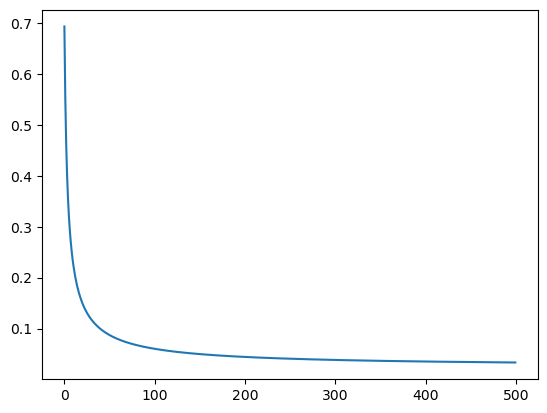

In [27]:
plt.plot(loss_epoch)

In [28]:
loss_epoch

[0.6931471805599452,
 0.5521858896961614,
 0.46186558896139635,
 0.39997459022631376,
 0.3548856074638387,
 0.3204466366458427,
 0.29318235423348166,
 0.27099366130840985,
 0.25253798804821653,
 0.2369151300703443,
 0.22349759445734305,
 0.21183366767209985,
 0.2015892714923109,
 0.19251160070458012,
 0.18440555356096136,
 0.17711797421216918,
 0.1705268304298246,
 0.1645336034666225,
 0.15905782412861943,
 0.15403307661088453,
 0.1494040271590207,
 0.14512418172209182,
 0.1411541709251015,
 0.13746042231287695,
 0.13401412096361792,
 0.13079038755041927,
 0.12776762227601754,
 0.12492697668979942,
 0.12225192506868476,
 0.11972791402105118,
 0.11734207406716621,
 0.11508298071064604,
 0.1129404553211569,
 0.11090539826194805,
 0.10896964830215547,
 0.10712586358517716,
 0.10536742037587322,
 0.1036883265500399,
 0.10208314737030968,
 0.10054694155094422,
 0.09907520597798888,
 0.09766382774208644,
 0.09630904237492957,
 0.09500739736910772,
 0.09375572021438543,
 0.092551090308516,
 0

In [29]:
weight

array([[-0.94022964],
       [-4.17218923],
       [ 2.51237014],
       [-2.91948468]])

In [30]:
# x1

In [31]:
h=hypothesis(x_data,weight)
h[:5,:]

array([[9.75698532e-01],
       [9.93361937e-01],
       [9.97167968e-01],
       [4.86548763e-04],
       [2.79625769e-02]])

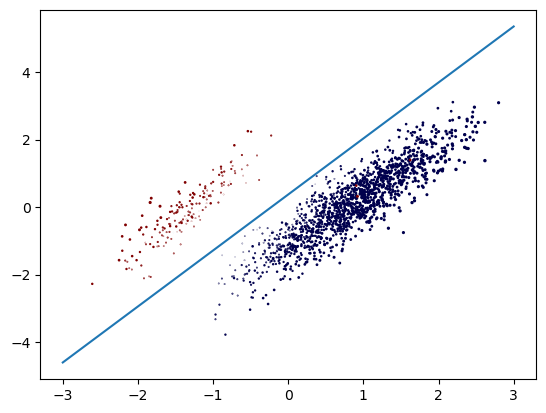

In [32]:
x1=np.arange(-3,4)

x2=-(weight[0]+weight[1]*x1)/weight[2]

plt.scatter(x_data[:,1],x_data[:,2],x_data[:,3],c=y_data,cmap=plt.cm.seismic)
plt.plot(x1,x2)

plt.show()

In [33]:
preds=[]
y_=hypothesis(test_x,weight)
for i in y_:
    if(i>0.5):
        preds.append(1)
    else:
        preds.append(0)
preds=np.array(preds)
# preds.reshape(-1,1)

In [34]:
test_y.shape

(900, 1)

In [35]:
preds=preds.reshape((900,1))

In [36]:
np.sum(preds==test_y)/preds.shape[0]*100

99.33333333333333

In [37]:
testing=pd.read_csv('./Test Cases/Logistic_X_Test.csv')

In [38]:
testing=testing.values
ones=np.ones((testing.shape[0],1))
testing=np.hstack((ones,testing))

In [39]:
ans=[]
results=hypothesis(testing,weight)
for i in results:
    if(i>=0.5):
        ans.append(1)
    else:
        ans.append(0)
ans=np.array(ans)

In [40]:
ans

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [41]:
ans.shape

(1000,)

In [42]:
result=pd.DataFrame(ans,columns=['label'])

In [43]:
result

,label
0,1
1,1
2,0
3,1
4,1
...,...
995,0
996,0
997,1
998,1


In [44]:
result.to_csv('preds.csv',index=False)

In [45]:
end=time.time()
print(end-start)

1.2464125156402588
